In [128]:
import xarray as xr
import glob
import matplotlib.pyplot as plt

In [151]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.ticker import (NullFormatter, ScalarFormatter)
import matplotlib.dates as mdates
from netCDF4 import Dataset
from wrf import to_np, getvar, ll_to_xy, ALL_TIMES
import matplotlib.dates as mdates

In [134]:

# Specify the directory path containing the wrfout files
directory = '/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2'

# Get a list of wrfout files in the directory
wrf_files = sorted(glob.glob(directory + '/wrfout_d02*'))

wrf_in = []
for file in wrf_files:
    wrf_in.append(Dataset(file))
    
p = getvar(wrf_in, "T2", timeidx=ALL_TIMES, method="cat")

lat1 = 43.0
lat2 = 44.0
lon1 = -116.0
lon2 = -116.0


In [135]:

x1, y1 = to_np(ll_to_xy(wrf_in, lat1, lon1))
x2, y2 = to_np(ll_to_xy(wrf_in, lat2, lon2))

In [136]:
p = p.sel(south_north=y1, west_east=x1)

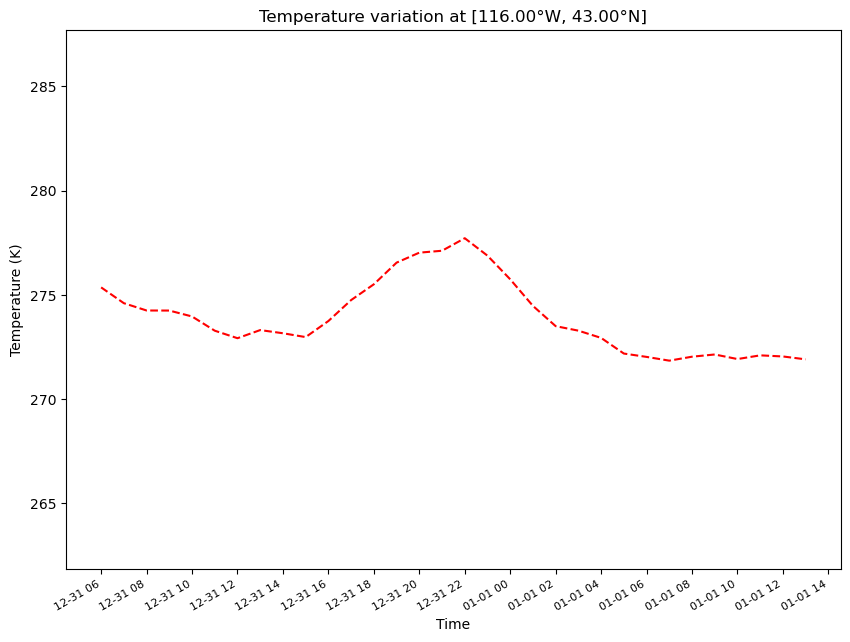

In [168]:
# Plot the line
p.plot.line('--', color='red', figsize=(10, 7))


# Customize x-axis labels

plt.xlabel('Time')
plt.ylabel('Temperature (K)')

# Set the y-axis limits
plt.ylim(p.min() - 10,p.max() + 10)  # Example limits, adjust as needed



# Add titles
ax = plt.gca()
ax.tick_params(axis='x', labelsize=8)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.title("Temperature variation at [{:.2f}°{}, {:.2f}°{}]".format(abs(lon),\
        "W" if lon < 0 else "E", abs(lat), "S" if lat < 0 else "N"))
plt.show()



In [188]:
%%bash
pwd

/bsuhome/stanleyakor/WRF-Analysis/WRF-PYTHON-TUTORIAL/day4_2


In [ ]:
%%bash
cd /bsuhome/st